# Predicting Stock trend with Random Forest Classifier Model


This notebook can be used to predict the trend of stock prices with sentiment scores and without. 

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from path import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [2]:
import sys
sys.path.append(BASE_PATH+'\master_code_lib')
from stock_modelling_functions import classifier_data_preprocessing, data_train_test_split

### Loading Combined Dataframe
Load a combined dataframe with sentimnt scores and financial data. 
combined_dataframe = ' '

In [3]:
# Loading data
file_path = combined_dataframe
df = pd.read_csv(file_path)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ts_polarity,twitter_volume
0,2016-01-04,25.65,26.34,25.50,26.34,24.44,270597600,0.070389,1133.0
1,2016-01-05,26.44,26.46,25.60,25.68,23.83,223164000,0.133635,1430.0
2,2016-01-06,25.14,25.59,24.97,25.17,23.36,273829600,0.072042,1949.0
3,2016-01-07,24.67,25.03,24.11,24.11,22.38,324377600,0.074369,2289.0
4,2016-01-08,24.64,24.78,24.19,24.24,22.50,283192000,0.051595,2235.0


### Creating the Features `X` and Target `y` Data

Pre-processing the data to get X and y.
If we want to include sentiment features we set the sentiment variable to 'True' else we set the sentiment variable to 'False'. 


In [4]:
X, y = classifier_data_preprocessing(df, sentiment=True)

### Split the data into training and testing data 
 Splitting the data based on 70% training set and 30% testing set ratio

In [5]:
X_train, X_test, y_train, y_test = data_train_test_split(X, y, split=0.7)

### Scaling the features


In [6]:
# Using StandardScaler to scale features data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Create a Random Forest Classifier Model


In [7]:
# Create RFClassifier model
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fit the model
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())  


### Making Predictions Using the Random Forest Classifier Model

In [8]:
# Make predictions
predictions = rf_model.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)

# Generate accuracy score for predictions using y_test
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.5776173285198556


### Model Evaluation

Evaluating model's results, using `sklearn` to calculate the confusion matrix and to generate the classification report.

In [9]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)

# Displaying results
display(cm_df)

,Predicted 0,Predicted 1
Actual 0,30,97
Actual 1,20,130


In [10]:
cm

array([[ 30,  97],
       [ 20, 130]], dtype=int64)

In [11]:
cm = np.array([[ 37,  90],
       [ 40, 110]])

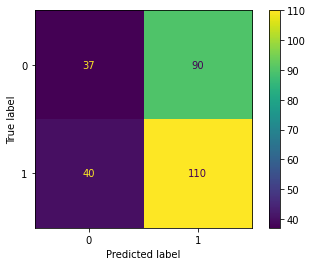

In [12]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_model.classes_,)
disp.plot()

In [13]:
# Generating classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.60      0.24      0.34       127
           1       0.57      0.87      0.69       150

    accuracy                           0.58       277
   macro avg       0.59      0.55      0.51       277
weighted avg       0.59      0.58      0.53       277

